In [41]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import scipy.stats as stats

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

mpl.rc('font',family='Malgun Gothic')

In [42]:
df1 = pd.read_csv('booking_data.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653821 entries, 0 to 1653820
Data columns (total 13 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   수주사업장   1653821 non-null  object 
 1   수주일자    1653821 non-null  int64  
 2   수주일련번호  1653821 non-null  int64  
 3   거래처코드   1653821 non-null  object 
 4   수주부서    1578349 non-null  object 
 5   수주품목코드  1653821 non-null  object 
 6   출고수량KG  1653821 non-null  int64  
 7   수주수량KG  1653821 non-null  int64  
 8   수주단가    1653821 non-null  float64
 9   수주금액    1653821 non-null  float64
 10  부가세금액   1653821 non-null  int64  
 11  출하완료여부  1653821 non-null  object 
 12  납기일자    1653820 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 164.0+ MB


In [44]:
df2 = pd.read_csv('Cooking_data.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24056 entries, 0 to 24055
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      24056 non-null  int64  
 1   생산라인코드  24056 non-null  object 
 2   생산라인명   24056 non-null  object 
 3   품목코드    24018 non-null  object 
 4   품목명     23999 non-null  object 
 5   작업장코드   24056 non-null  object 
 6   충전실온도   24056 non-null  float64
 7   실링온도    24028 non-null  float64
 8   쿠킹온도    24028 non-null  float64
 9   쿠킹스팀압력  24056 non-null  float64
 10  실링압력    24056 non-null  float64
 11  생산시간    22982 non-null  float64
 12  생산일자    24056 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 2.4+ MB


In [45]:
df3 = pd.read_csv('Error_Message.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   순번             1074 non-null   int64 
 1   생산라인코드         1074 non-null   object
 2   생산라인명          1074 non-null   object
 3   품목코드           1072 non-null   object
 4   품목명            1071 non-null   object
 5   발생시간           1074 non-null   object
 6   종료시간           1074 non-null   object
 7   오류조치시간         1074 non-null   int64 
 8   비가동코드          1074 non-null   object
 9   Error_Message  1074 non-null   object
 10  오류발생작업장명       1074 non-null   object
 11  생산일자           1074 non-null   object
dtypes: int64(2), object(10)
memory usage: 100.8+ KB


In [46]:
df4 = pd.read_csv('Product_Name.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   품목코드      2835 non-null   object 
 1   품목명       2825 non-null   object 
 2   평균수주단가    1261 non-null   float64
 3   Column 4  0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 88.8+ KB


# 1. 생산예측을 위한 Time Series 구축 

1. 주요 수주 품목 확인 
2. 주요 품목 중, 수주일자와 납품일자를 비교해, 납품까지 오래 걸린 품목 확인 
3. 납품이 오래걸린 품목에 대한 Time Series 구축 

In [47]:
# 주요 수주 품목 확인 
df1_clean0 = pd.merge(df1, df4.rename(columns={'품목코드':'수주품목코드'}), on='수주품목코드', how='left')

In [48]:
df1_clean0.isnull().sum()

수주사업장             0
수주일자              0
수주일련번호            0
거래처코드             0
수주부서          75472
수주품목코드            0
출고수량KG            0
수주수량KG            0
수주단가              0
수주금액              0
부가세금액             0
출하완료여부            0
납기일자              1
품목명          561027
평균수주단가       561022
Column 4    1653821
dtype: int64

In [49]:
df1_clean0_pivot = df1_clean0.pivot_table(index='품목명', values='수주금액', aggfunc='sum').reset_index()
df1_clean0_pivot.sort_values(by='수주금액',ascending=False).head(20)

,품목명,수주금액
344,마요네즈-업소용10kg,1.428998e+10
656,시아스단호박샐러드,1.184885e+10
209,골드마요네즈3.2kg,1.104477e+10
426,미스터피자살사소스엠피,9.877121e+09
422,미스터피자단호박샐러드,8.407089e+09
121,NEW단호박샐러드-1,8.062387e+09
1130,해표골드마요네즈,7.897138e+09
985,치즈소스-BK,7.326641e+09
623,쉐프솔루션베이스볶음밥(시즌)500g,6.908628e+09
880,이츠웰골드마요네즈3.2kg,6.044347e+09


In [50]:
top_list = df1_clean0_pivot.sort_values(by='수주금액',ascending=False).head(20)['품목명'].values.tolist()

In [51]:
# 생산 출하일자 관련 데이터셋 
df1.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자
0,A,20151214,441,SI0298,sc600,16A01039,5,5,3630.0,16500.0,1650,Y,20151215
1,A,20151214,443,SI0298,sc600,16D01021,100,100,5400.0,540000.0,0,Y,20151215
2,B4,20151214,2,IJ9455,400,1S101004,922,922,5200.0,567273.0,56727,Y,20151214
3,A,20151214,451,SI0346,sc600,1BA04019,40,40,310.0,45091.0,4509,Y,20151215
4,A,20151214,452,SI0346,sc600,1BA04001,18,18,1550.0,22546.0,2254,Y,20151215


In [52]:
# 수주 일자에 포함된 0 값 제거 
cond1 = (df1_clean0['수주일자'] == 0)|(df1_clean0['납기일자'] == 0) 
cond2 = (df1_clean0['납기일자'] == '2015-02-')|(df1_clean0['납기일자'] == 19000100)|(df1_clean0['납기일자'] == 43470725)|\
        (df1_clean0['납기일자'] == '2018-05-')|(df1_clean0['납기일자'] == '6월 5일')|(df1_clean0['납기일자'] == '6월 12일')|\
        (df1_clean0['납기일자'] == '2018-061')|(df1_clean0['납기일자'] == '43616')|(df1_clean0['납기일자'] == '30180430')

df1_clean0.loc[cond1|cond2]

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,품목명,평균수주단가,Column 4
290056,C,20111128,62,IJ3094,202,13K02080,240,240,3300.0,792000.0,39600,Y,19000100,시아스살사소스,5303.130503,NaN
290818,C,20111201,86,IJ3160,202,13K02080,36,36,3250.0,117000.0,5850,Y,19000100,시아스살사소스,5303.130503,NaN
290819,C,20111201,87,IJ3160,202,13D08030,120,120,2850.0,342000.0,17100,Y,19000100,시아스칠리소스2kg,4112.129662,NaN
290820,C,20111201,88,IJ3160,202,13K01115,36,36,2750.0,99000.0,4950,Y,19000100,시아스핫칠리소스,4345.622956,NaN
290821,C,20111201,89,IJ3160,202,13D04105,96,96,3550.0,340800.0,17040,Y,19000100,요거트드레싱골드,5259.027064,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115367,C,20200329,27,IK0299,400,13K03132,0,144,3400.0,489600.0,16320,Y,19000100,어니언크림소스-S,3539.990826,NaN
1115368,C,20200329,28,IK0299,400,13R11041,0,228,2700.0,615600.0,20520,Y,19000100,촉촉한스테이크소스,2466.172680,NaN
1115369,C,20200329,29,IK0299,400,16A03024,0,360,4450.0,1602000.0,160200,Y,19000100,NaN,NaN,NaN
1115370,C,20200329,30,IK0299,400,16A03020,0,20,4200.0,84000.0,8400,Y,19000100,콘치즈샐러드,3789.732715,NaN


In [53]:
df1_clean1 = df1_clean0.loc[~(cond1|cond2)]

In [54]:
df1_clean2 = df1_clean1.drop(columns=['Column 4']).dropna()

In [55]:
df1_clean2['납기일자(int)'] = df1_clean2['납기일자'].astype(int)

In [72]:
cond0 = (df1_clean2['납기일자(int)']<20220000)
cond1 = (df1_clean2['납기일자(int)']>20100000)
df1_clean3 = df1_clean2.loc[cond0&cond1]

In [74]:
df1_clean3['수주일자(clean)'] = pd.to_datetime(df1_clean3['수주일자'],format='%Y%m%d')
df1_clean3['납기일자(clean)'] = pd.to_datetime(df1_clean3['납기일자'],format='%Y%m%d')

<ipython-input-74-643077377120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean3['수주일자(clean)'] = pd.to_datetime(df1_clean3['수주일자'],format='%Y%m%d')
<ipython-input-74-643077377120>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean3['납기일자(clean)'] = pd.to_datetime(df1_clean3['납기일자'],format='%Y%m%d')


In [75]:
df1_clean3[['수주일자(clean)','납기일자(clean)']].describe()

<ipython-input-75-ea98eacdfc7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1_clean3[['수주일자(clean)','납기일자(clean)']].describe()
<ipython-input-75-ea98eacdfc7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1_clean3[['수주일자(clean)','납기일자(clean)']].describe()


,수주일자(clean),납기일자(clean)
count,979677,979677
unique,4288,4324
top,2020-08-18 00:00:00,2018-10-31 00:00:00
freq,1205,893
first,2009-12-15 00:00:00,2010-01-01 00:00:00
last,2021-11-30 00:00:00,2021-12-31 00:00:00


In [76]:
df1_clean3['생산기간'] = df1_clean3['납기일자(clean)'] - df1_clean3['수주일자(clean)']
df1_clean3['생산기간'].describe()

<ipython-input-76-621a315cc0be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean3['생산기간'] = df1_clean3['납기일자(clean)'] - df1_clean3['수주일자(clean)']


count                       979677
mean     1 days 05:29:46.567205313
std      9 days 12:28:09.929011642
min            -866 days +00:00:00
25%                1 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max             1099 days 00:00:00
Name: 생산기간, dtype: object

In [77]:
def func2(row):
    result = str(row).split(' ')[0]
    return int(result) 

df1_clean3['생산기간(int)'] = df1_clean3['생산기간'].apply(func2)

<ipython-input-77-d488b0a44277>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean3['생산기간(int)'] = df1_clean3['생산기간'].apply(func2)


In [83]:
cond1 = (df1_clean3['생산기간(int)'] > 0)
df1_clean3_pivot0 = df1_clean3.loc[cond1].pivot_table(index='품목명',values='생산기간(int)').reset_index()
df1_clean3_pivot0.sort_values(by='생산기간(int)',ascending=False).head(10)

,품목명,생산기간(int)
814,요리하다오징어김치볶음밥,361.000000
815,요리하다제육볶음밥,361.000000
834,유자마요네즈500g,85.000000
833,유자마요네즈290g,85.000000
102,Homeplus signature 새우볶음밥,74.800000
97,G-price마요네즈500g,71.666667
61,1974새우볶음밥240g,39.421053
898,정성담은발사믹드레싱(245g),35.363636
299,디프라이스마요네즈-1 1kg,32.056604
301,디프라이스마요네즈튜브,27.636364


In [84]:
# 주요 품목에 대한 납품기간 추이 
def func1(data):
    if data in top_list :
        return True
    else:
        return False
    
df1_clean3_pivot01 = df1_clean3_pivot0.loc[(df1_clean3_pivot0['품목명'].apply(func1))]
df1_clean3_pivot01

,품목명,생산기간(int)
117,NEW단호박샐러드-1,1.225417
204,골드마요네즈3.2kg,1.970006
336,마요네즈-업소용10kg,1.914192
412,미스터피자고구마샐러드엠피,5.911061
413,미스터피자단호박샐러드,6.063567
417,미스터피자살사소스엠피,6.031156
420,미스터피자피자소스엠피,6.075610
482,"비비고낙지비빔밥(밥,낙지비빔양념장)",1.403153
488,"비비고불고기비빔밥(밥,참기름)",1.421053
515,빠네크림소스T,1.071795


- 수주에서 납기일까지 3일 이상 걸리는 품목 확인 
- 주로 미스터 피자 업체의 품목에서 생산 후 납기까지 시간이 오래 발생하는 것을 확인 

In [85]:
cond1 = (df1_clean3_pivot01['생산기간(int)']> 3)
df1_clean3_pivot01.loc[cond1]

,품목명,생산기간(int)
412,미스터피자고구마샐러드엠피,5.911061
413,미스터피자단호박샐러드,6.063567
417,미스터피자살사소스엠피,6.031156
420,미스터피자피자소스엠피,6.075610
647,시아스단호박샐러드(이랜드),4.463441
1083,피자스쿨마요네즈,3.257030


# ARIMA Model 

- '미스터 피자' 브랜드에 대한 공급 기간을 단축 시키기 위한 예측 생산 시스템 구축 
- ARIMA Model을 이용해, 미스터피자 품목에 대해 시계열 예측 실시 

In [86]:
import statsmodels.api as sm 
import warnings 
import itertools
from pylab import rcParams 

In [87]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [88]:
def func1(row):
    if pd.isnull(row) :
        return '일반'  
    
    if '미스터' in row:
        return '미스터피자'
    else:
        return '일반' 

df1_clean3['타겟브랜드'] = df1_clean3['품목명'].apply(func1)

<ipython-input-88-d46839c1b948>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean3['타겟브랜드'] = df1_clean3['품목명'].apply(func1)


In [89]:
df1_clean3_pivot = df1_clean3.pivot_table(index=['수주일자(clean)','타겟브랜드'],
                                          values='수주금액').reset_index()

In [90]:
cond1 = df1_clean3_pivot['타겟브랜드']=='미스터피자'
data1 = df1_clean3_pivot.loc[cond1][['수주일자(clean)','수주금액']].set_index('수주일자(clean)')

In [91]:
y = data1['수주금액'].resample('1W').mean().fillna(method='ffill')

In [92]:
y.head()

수주일자(clean)
2010-01-03    5.376472e+06
2010-01-10    5.969919e+06
2010-01-17    4.864513e+06
2010-01-24    6.954604e+06
2010-01-31    4.476198e+06
Freq: W-SUN, Name: 수주금액, dtype: float64

In [93]:
y.tail()

수주일자(clean)
2021-09-26    468000.0
2021-10-03    468000.0
2021-10-10    468000.0
2021-10-17    468000.0
2021-10-24      9720.0
Freq: W-SUN, Name: 수주금액, dtype: float64

<ipython-input-94-7a47d0d0d8eb>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition= sm.tsa.seasonal_decompose(y, freq= 11, model='additive')
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


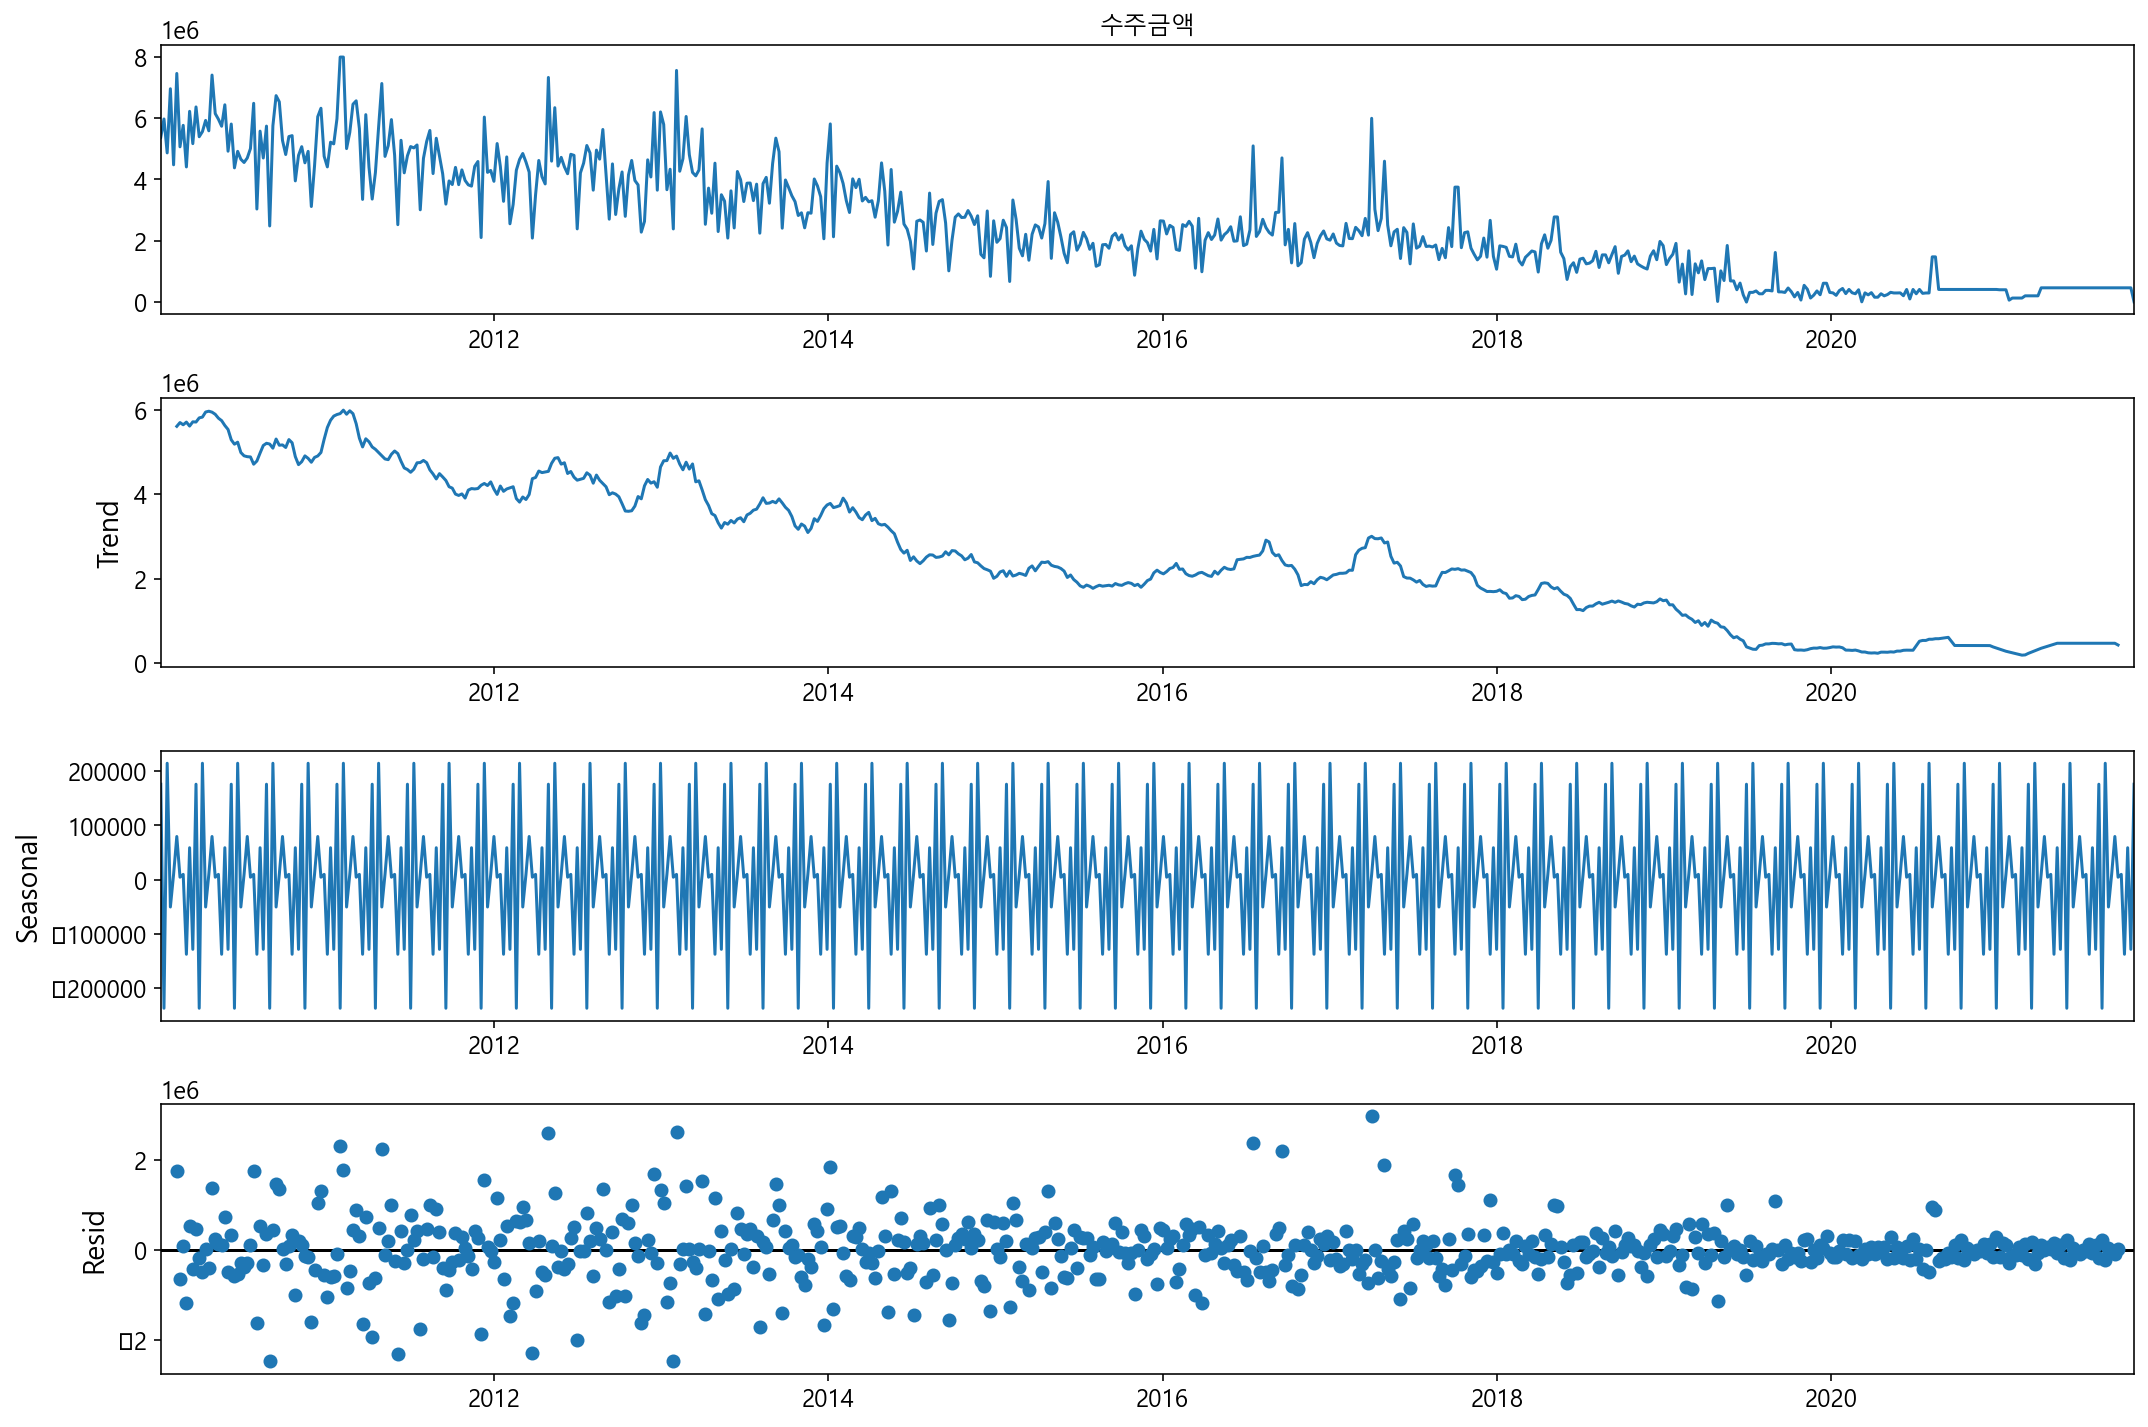

In [94]:
decomposition= sm.tsa.seasonal_decompose(y, freq= 11, model='additive')
fig = decomposition.plot()
plt.show()

In [95]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

In [96]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [97]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,
             'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [98]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
47,"(1, 0, 1)","(1, 1, 1, 12)",17851.813801
43,"(1, 0, 1)","(0, 1, 1, 12)",17854.343436
63,"(1, 1, 1)","(1, 1, 1, 12)",17863.796801
59,"(1, 1, 1)","(0, 1, 1, 12)",17864.662732
31,"(0, 1, 1)","(1, 1, 1, 12)",17868.762047
...,...,...,...
12,"(0, 0, 1)","(1, 0, 0, 12)",19276.347168
9,"(0, 0, 1)","(0, 0, 1, 12)",19315.917844
1,"(0, 0, 0)","(0, 0, 1, 12)",19389.904399
8,"(0, 0, 1)","(0, 0, 0, 12)",19798.810919


In [99]:
mod = sm.tsa.statespace.SARIMAX(y,
                                 order=(1, 0, 1),
                                 seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9399      0.014     65.342      0.000       0.912       0.968
ma.L1         -0.7514      0.045    -16.625      0.000      -0.840      -0.663
ma.S.L12      -0.7891      0.030    -26.665      0.000      -0.847      -0.731
sigma2       1.18e+12   1.61e-15   7.31e+26      0.000    1.18e+12    1.18e+12


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


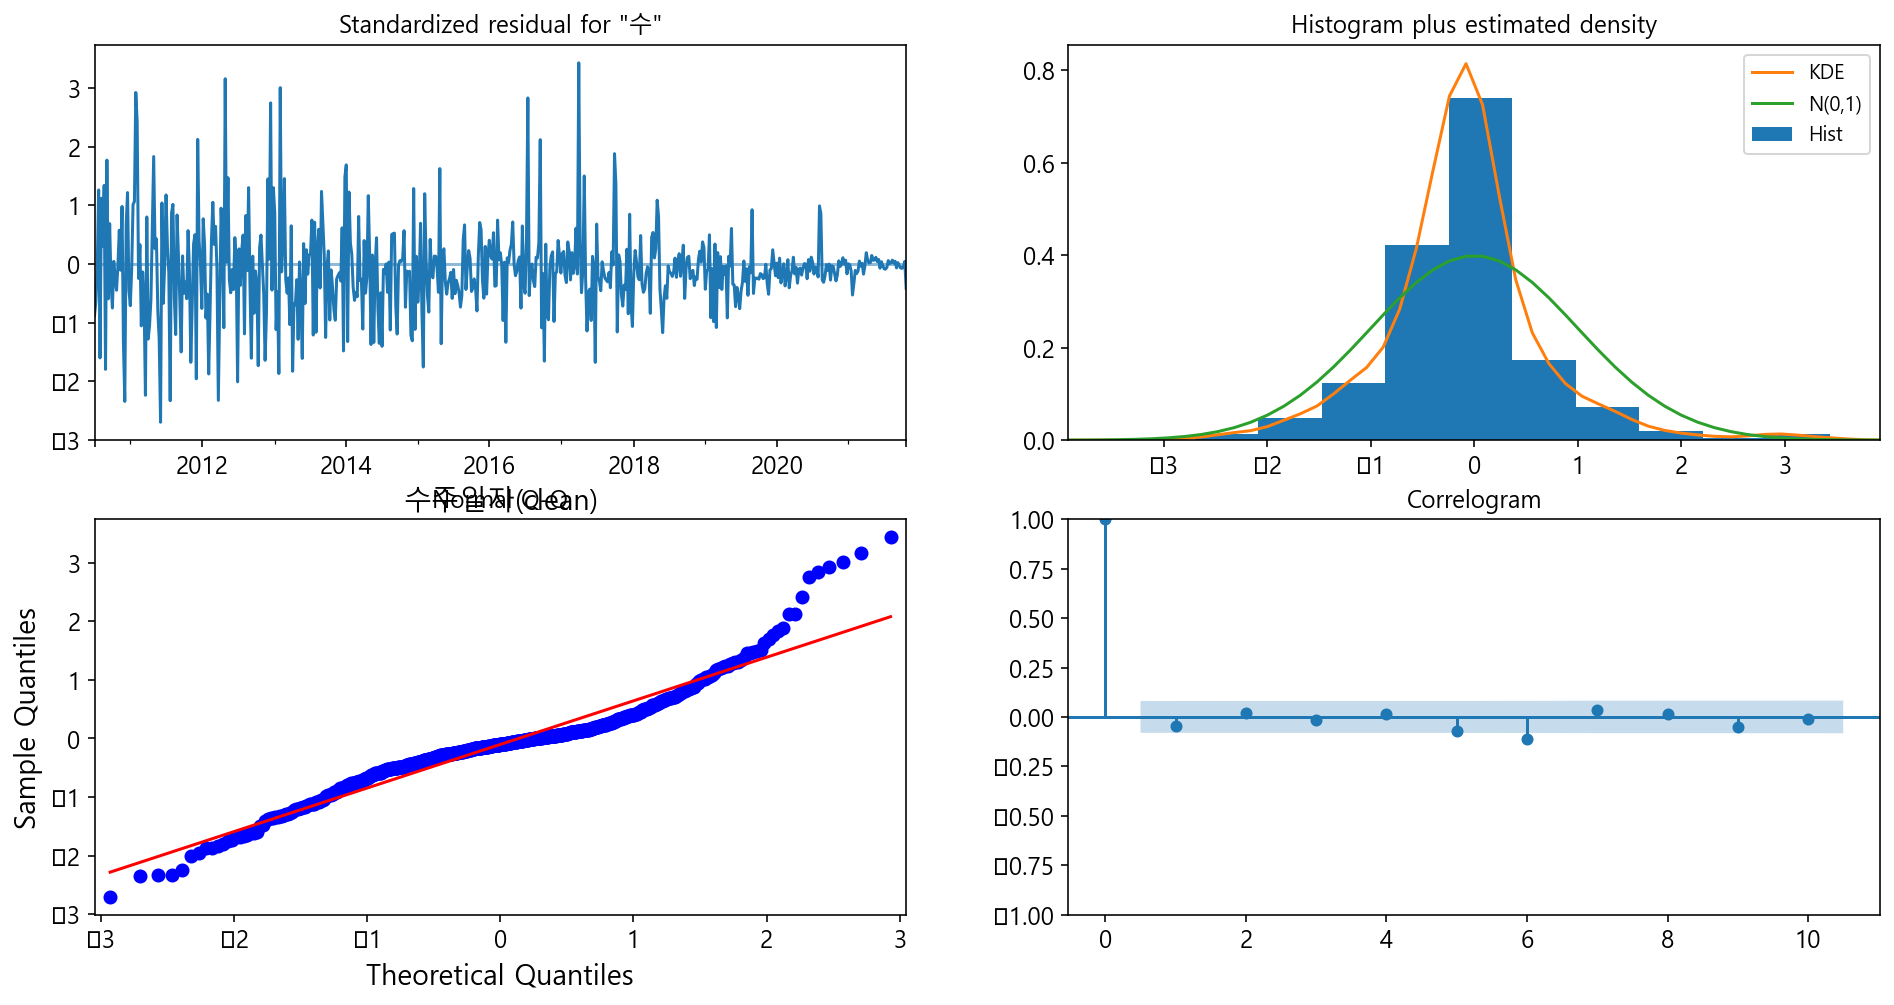

In [100]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [101]:
results.get_prediction()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


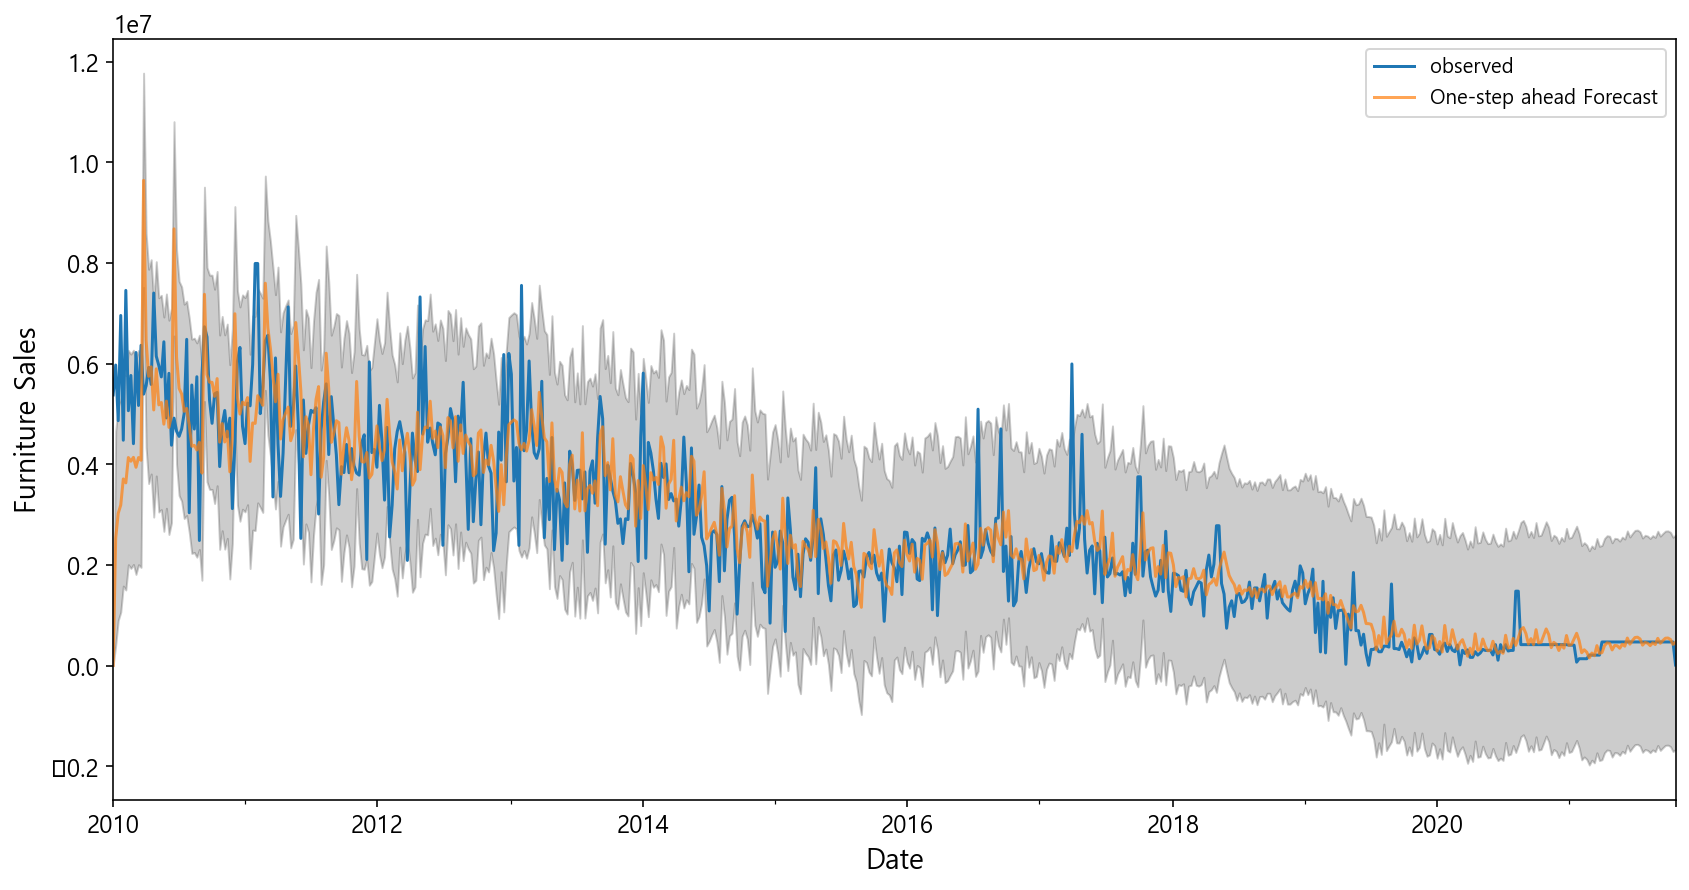

In [104]:
pred = results.get_prediction(start=pd.to_datetime('2010-01-03'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [105]:
y_forecasted = pred.predicted_mean
y_truth = y['2008-10-12':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 854401716363.57


In [106]:
y_forecasted.head()

수주일자(clean)
2010-01-03    0.000000e+00
2010-01-10    2.526647e+06
2010-01-17    3.023865e+06
2010-01-24    3.189084e+06
2010-01-31    3.707233e+06
Freq: W-SUN, Name: predicted_mean, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


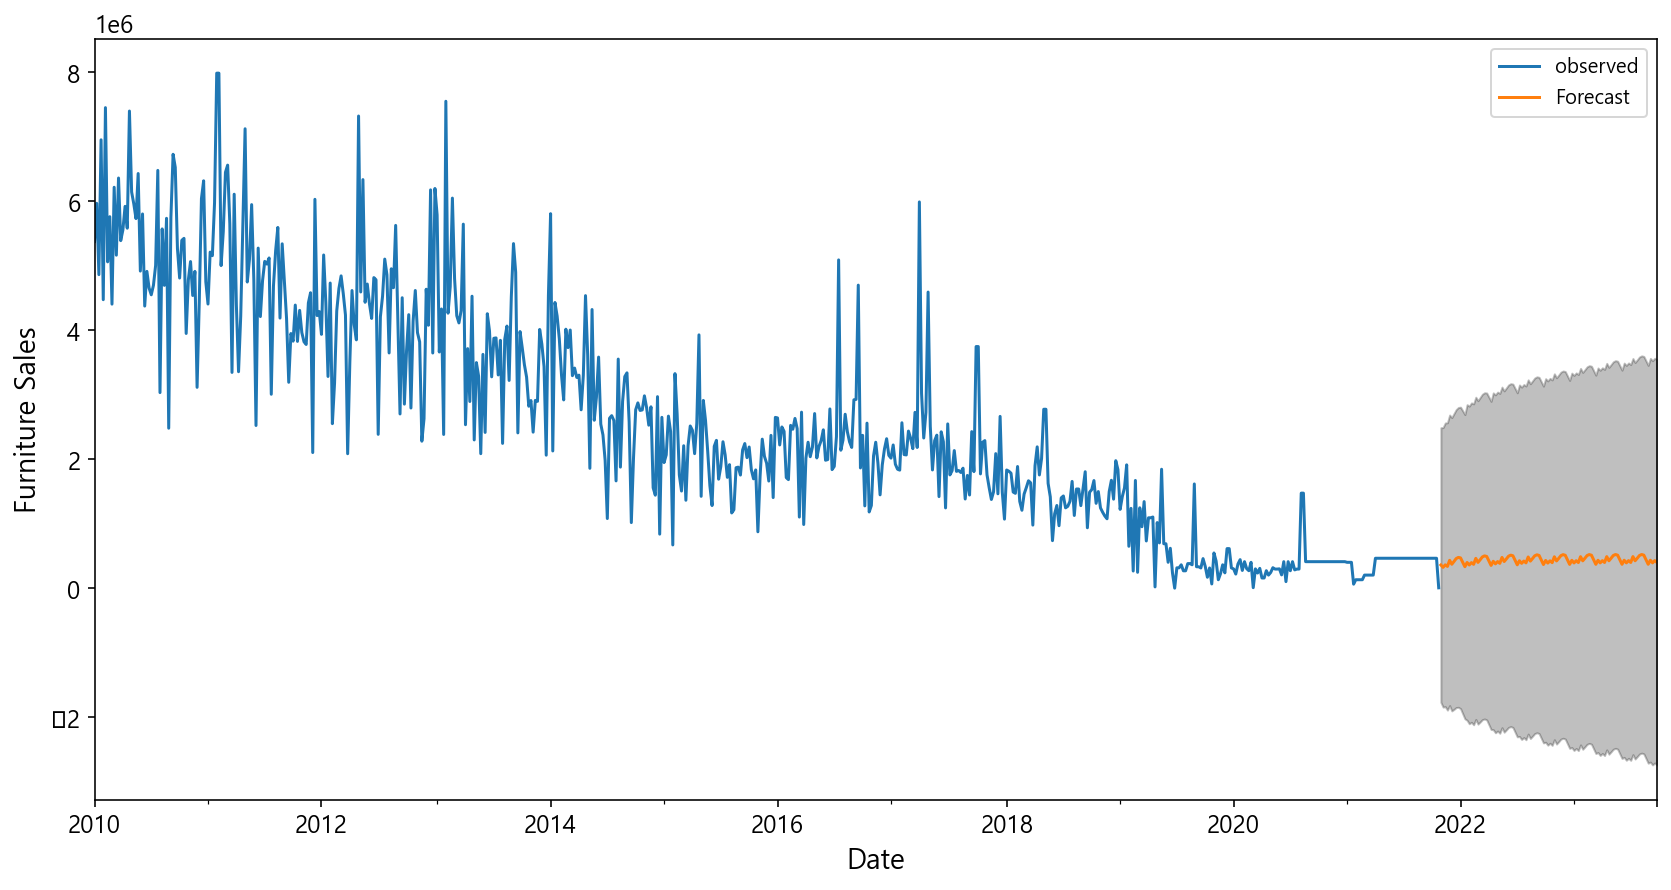

In [107]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# 2. 주요 불량 품목에 대한 조업 조건 최적화 

1. 주요 불량품목 확인
2. 주요 불량 원인 파악 및 조업 조건 최적화 (파레토도 / 관리도) 

In [108]:
df2.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산일자
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37,2021-01-03
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83,2021-01-03
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55,2021-01-03
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81,2021-01-03
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40,2021-01-03


In [109]:
df2.columns

Index(['순번', '생산라인코드', '생산라인명', '품목코드', '품목명', '작업장코드', '충전실온도', '실링온도',
       '쿠킹온도', '쿠킹스팀압력', '실링압력', '생산시간', '생산일자'],
      dtype='object')

In [110]:
df2['ID'] = df2['생산일자'] + df2['품목코드'] + df2['생산라인코드'] + df2['순번'].astype(str)
df3['ID'] = df3['생산일자'] + df3['품목코드'] + df3['생산라인코드'] + df3['순번'].astype(str)

In [111]:
df2_1 = df2.drop(columns=['순번', '생산라인코드', '생산라인명', '생산일자','품목코드', '작업장코드','품목명'])

In [112]:
df_error = pd.merge(df3, df2_1, how='left', on='ID')
df_error.head(3)

,순번,생산라인코드,생산라인명,품목코드,품목명,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,생산일자,ID,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,10,D004,PET병,13D02080,참깨흑임자드레싱,14:16,14:24,8,W0056B4,위치조정실패,충전실,2021-01-03,2021-01-0313D02080D00410,71.125831,93.425831,127.878281,22.968,201.430,NaN
1,7,D011,2동 오리히로,16A01016,시아스고구마샐러드믹스,18:54,19:03,9,W005711,대기,충전실,2021-01-04,2021-01-0416A01016D0117,71.587470,103.987470,138.736120,23.166,204.974,NaN
2,2,C002,쿠커 #2,23K01321,나가사키베이스(재),9:51,9:58,7,W003452,충진 오류,쿠킹실,2021-01-05,2021-01-0523K01321C0022,70.540995,102.440995,137.135195,23.129,204.249,NaN


In [113]:
df_error['불량수'] = 1 

In [114]:
df_error_product = df_error.pivot_table(index='품목명',values='불량수',aggfunc='sum').reset_index()
df_error_product.sort_values(by='불량수',ascending=False).head(10)

,품목명,불량수
103,게살볶음밥E,16
472,참깨흑임자드레싱,15
130,김치볶음밥-S,15
270,비비고깍두기볶음밥200g(재),13
281,비비고불고기비빔밥200g,12
119,골드마요네즈3.2kg,11
269,비비고깍두기볶음밥200g,11
284,비비고새우볶음밥210g(알밥),10
245,미스터피자피자소스엠피(재),9
336,쉐프솔루션베이스볶음밥(시즌)500g,9


- 볶음밥 제품에서 불량이 많이 발생하는 것을 확인 

In [115]:
def func1(row):
    if pd.isnull(row):
        return row
    
    if '볶음밥' in row:
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '취나물밥' in row :
        return 'rice'
    elif '곤드레밥' in row :
        return 'rice'
    else:
        return 'ect'
    
df_error['구분'] = df_error['품목명'].apply(func1)
df_error['구분'].value_counts()

ect     700
rice    373
Name: 구분, dtype: int64

In [116]:
cond1 = (df_error['구분']=='rice')
df_error_rice = df_error.loc[cond1]
df_error_rice.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,...,생산일자,ID,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,불량수,구분
393,1,C001,쿠커 #1,21501131,조미유-쉐프솔루션베이스볶음밥(시즌)(재),14:00,15:37,97,W003325,기타,...,2018-11-14,2018-11-1421501131C0011,72.804711,94.104711,128.768211,23.109,198.567,NaN,1,rice
411,8,D088,냉동밥 내포장#1,1BA03069,CJ낙지볶음밥*5ea,13:40,13:50,10,W005211,PSD패킹 교체,...,2017-02-16,2017-02-161BA03069D0888,72.379567,123.479567,158.026317,23.031,198.681,NaN,1,rice
412,7,P022,냉동밥 외포장#2,1BA03158,비비고불고기비빔밥200g,12:30,13:00,30,W007461,기기세팅,...,2017-02-16,2017-02-161BA03158P0227,69.081732,78.881732,113.304632,22.949,204.408,NaN,1,rice
414,15,C088,냉동밥 취반#1,2BA03056,야채볶음밥베이스3kg(재),10:54,12:01,67,W0034B1,공정 과부하,...,2017-03-03,2017-03-032BA03056C08815,68.714462,79.214462,113.540962,22.884,198.796,NaN,1,rice
415,24,C088,냉동밥 취반#1,2BA03047,시아스야채볶음밥3kg(재),21:40,22:35,55,W0034B1,공정 과부하,...,2017-03-03,2017-03-032BA03047C08824,69.565660,80.665660,115.224060,23.039,196.889,NaN,1,rice


- 볶음밥 제품에서의 주요 불량 인자 파악 (파레토 그림)

In [117]:
df_error_rice_pivot = df_error_rice.pivot_table(index='Error_Message',
                                                values='불량수',aggfunc='sum').reset_index()

In [118]:
df_error_rice_pivot['발생비율'] = df_error_rice_pivot['불량수'] / df_error_rice_pivot['불량수'].sum()
df_error_rice_pivot  = df_error_rice_pivot.sort_values(by='발생비율', ascending=False)
df_error_rice_pivot['누적발생비율'] = df_error_rice_pivot['발생비율'].cumsum()

In [119]:
df_error_rice_pivot

,Error_Message,불량수,발생비율,누적발생비율
1,공정 과부하,270,0.723861,0.723861
10,장비 오염,52,0.139410,0.863271
12,충진 오류,18,0.048257,0.911528
4,기타,11,0.029491,0.941019
5,별도구작업,7,0.018767,0.959786
6,볶음,6,0.016086,0.975871
9,원료,2,0.005362,0.981233
0,PSD패킹 교체,1,0.002681,0.983914
2,구동부 이상,1,0.002681,0.986595
3,기기세팅,1,0.002681,0.989276


In [120]:
df_error_rice_pivot['Line']= 0.8

<AxesSubplot:xlabel='Error_Message', ylabel='불량수'>

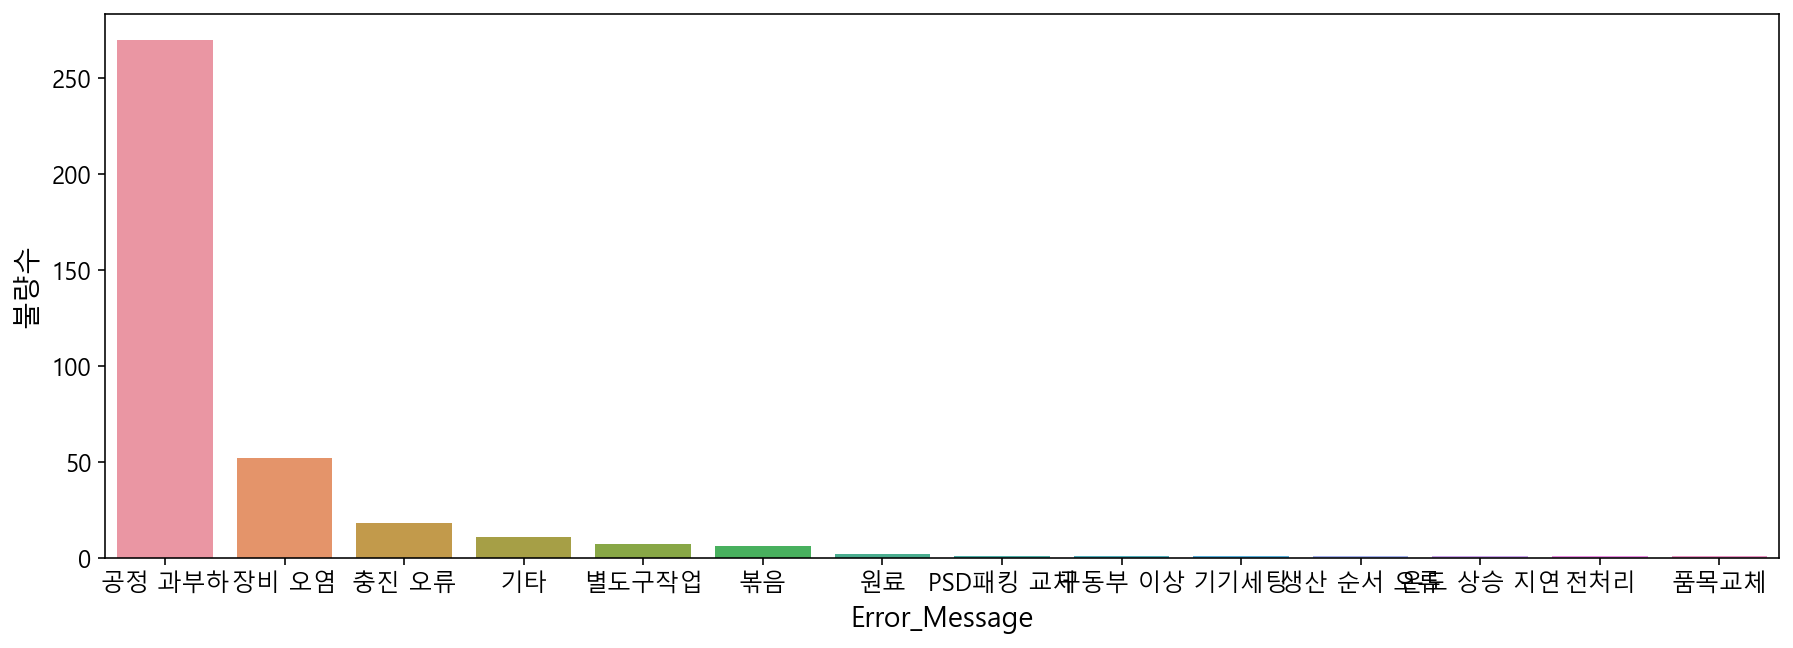

In [121]:
plt.figure(figsize=[15,5])
sns.barplot(data=df_error_rice_pivot, x='Error_Message',y='불량수')

<AxesSubplot:xlabel='Error_Message', ylabel='누적발생비율'>

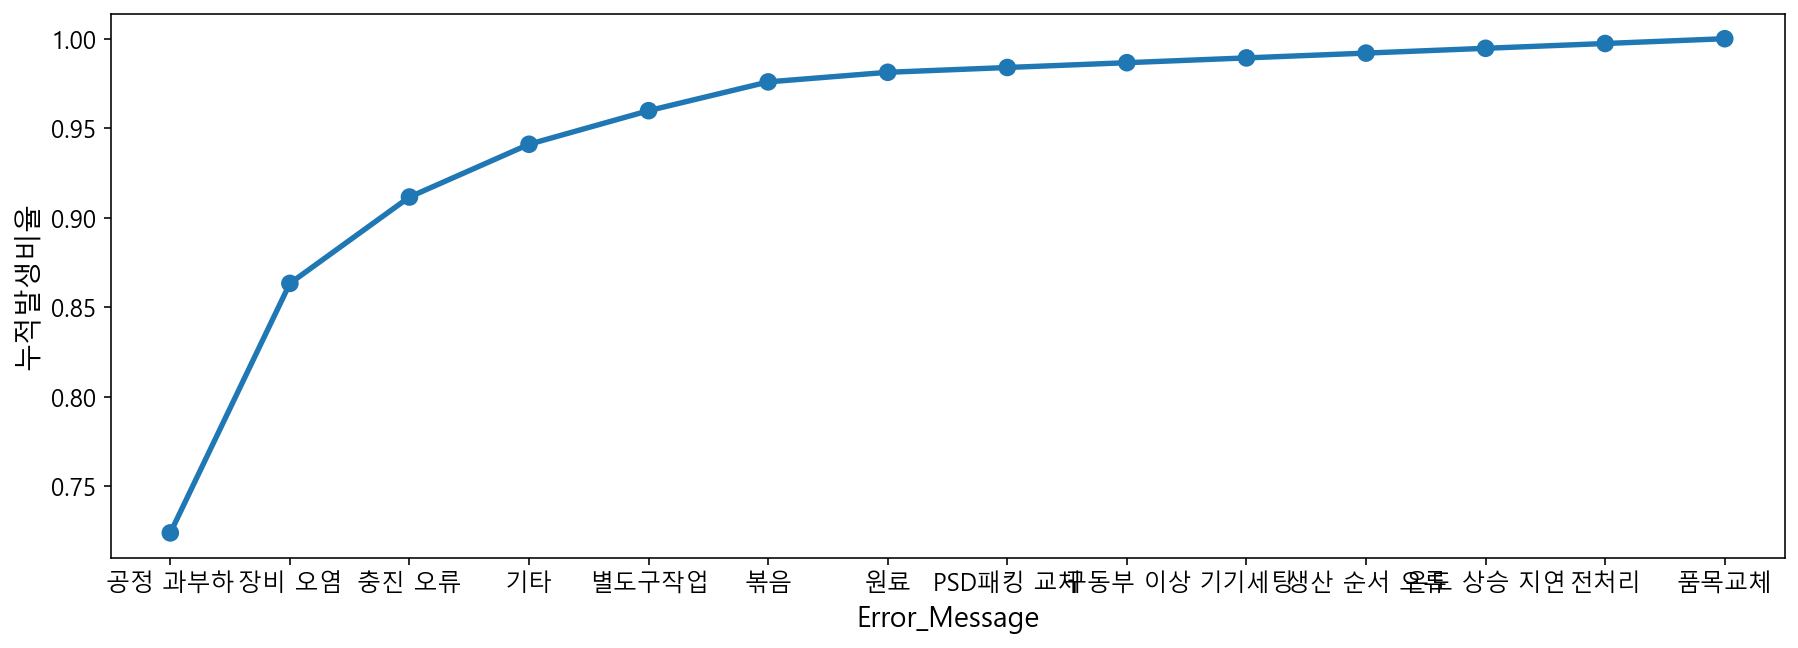

In [122]:
plt.figure(figsize=[15,5])
sns.pointplot(data=df_error_rice_pivot, x='Error_Message',y='누적발생비율')

<AxesSubplot:label='85fb6483-b28a-4917-a56b-65d04e05f464', xlabel='Error_Message', ylabel='누적발생비율'>

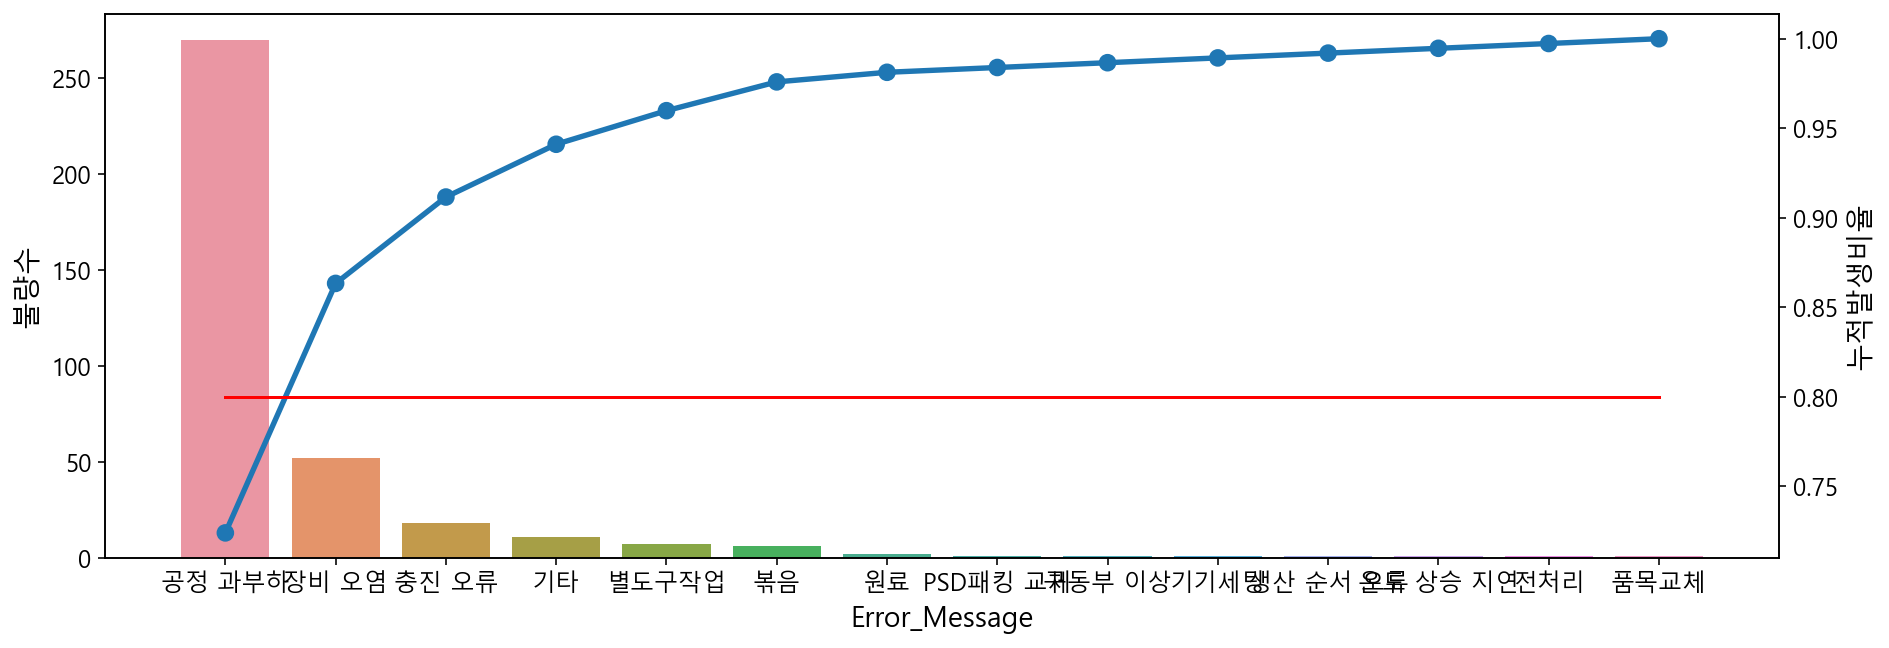

In [123]:
plt.figure(figsize=[15,5])
x1 = sns.barplot(data=df_error_rice_pivot, x='Error_Message',y='불량수') # y 축 범위 : 0~ 140
x2 = x1.twinx() # 서로 다른 스케일의 y축을 잡아주는 함수 
sns.pointplot(data=df_error_rice_pivot, x='Error_Message',y='누적발생비율') 
sns.lineplot(data=df_error_rice_pivot, x='Error_Message',y='Line', color='r')

- 공정 과부하 에러에서 불량이 핵심적으로 발생하는 것을 확인 
- 복음밥 제품 생산에서 품목 교체 에러와 정상 제품의 공정 조업조건 비교 

In [127]:
df3_1 = df3.drop(columns=['순번', '생산라인코드', '생산라인명', '생산일자','품목코드','품목명'])

In [128]:
df3_process = pd.merge(df2, df3_1, how='left', on='ID')
df3_process.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산일자,ID,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37,2021-01-03,2021-01-0323K01312C0013,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83,2021-01-03,2021-01-0323V00019C0021,NaN,NaN,NaN,NaN,NaN,NaN
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55,2021-01-03,2021-01-031.#JE+00C00313,NaN,NaN,NaN,NaN,NaN,NaN
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81,2021-01-03,2021-01-0326A01006C0057,NaN,NaN,NaN,NaN,NaN,NaN
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40,2021-01-03,2021-01-0326B06024C0072,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
cond1 = (df3_process['Error_Message'].isnull())
df3_process.loc[cond1, 'Target']= 0
df3_process.loc[~cond1, 'Target']= 1

df3_process['Target'].value_counts() # 불량 여부 

0.0    22946
1.0     1150
Name: Target, dtype: int64

In [130]:
def func1(row):
    if pd.isnull(row):
        return row
    
    if '볶음밥' in row:
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '취나물밥' in row :
        return 'rice'
    elif '곤드레밥' in row :
        return 'rice'
    else:
        return 'ect'
    
df3_process['구분'] = df3_process['품목명'].apply(func1)
df3_process['구분'].value_counts()

ect     15372
rice     8629
Name: 구분, dtype: int64

In [131]:
cond1 = (df3_process['구분']=='rice')
df3_process_rice = df3_process.loc[cond1]
df3_process_rice.head(3)

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산일자,ID,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,Target,구분
6607,1,C010,파일롯,21501104,조미액-게살볶음밥(재),W003,71.830523,87.230523,122.671673,23.627,...,2016-04-10,2016-04-1021501104C0101,NaN,NaN,NaN,NaN,NaN,NaN,0.0,rice
6626,6,C001,쿠커 #1,21501104,조미액-게살볶음밥(재),W003,71.285980,93.785980,129.305030,23.679,...,2016-04-29,2016-04-2921501104C0016,NaN,NaN,NaN,NaN,NaN,NaN,0.0,rice
6667,1,C001,쿠커 #1,21501106,조미액-새우볶음밥(재),W003,72.170049,92.270049,128.273049,24.002,...,2016-06-05,2016-06-0521501106C0011,NaN,NaN,NaN,NaN,NaN,NaN,0.0,rice


In [132]:
df3_process_rice.columns

Index(['순번', '생산라인코드', '생산라인명', '품목코드', '품목명', '작업장코드', '충전실온도', '실링온도',
       '쿠킹온도', '쿠킹스팀압력', '실링압력', '생산시간', '생산일자', 'ID', '발생시간', '종료시간',
       '오류조치시간', '비가동코드', 'Error_Message', '오류발생작업장명', 'Target', '구분'],
      dtype='object')

<AxesSubplot:xlabel='Target', ylabel='충전실온도'>

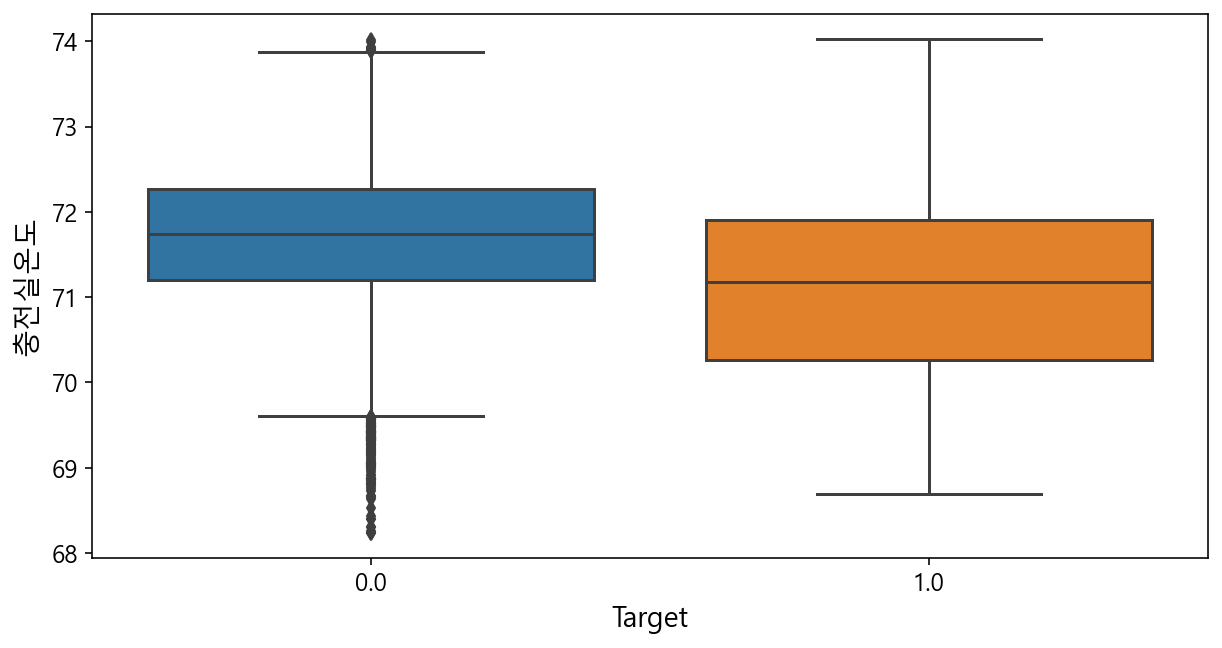

In [133]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='충전실온도')

<AxesSubplot:xlabel='Target', ylabel='실링온도'>

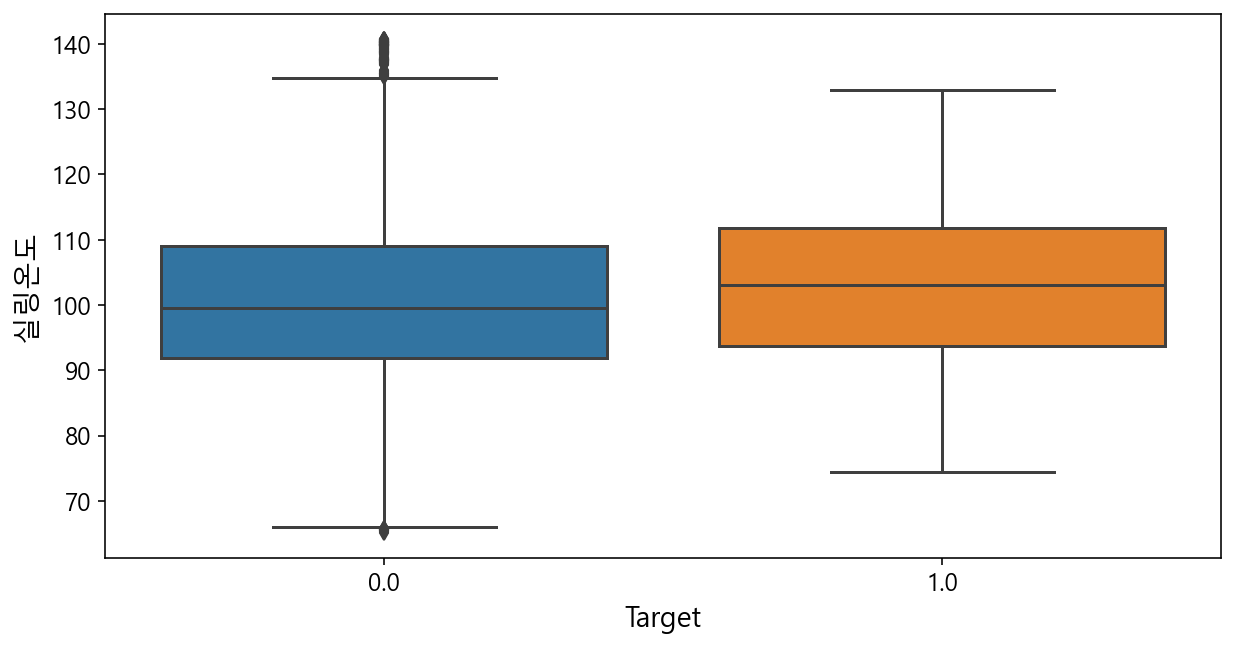

In [134]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='실링온도')

<AxesSubplot:xlabel='Target', ylabel='쿠킹온도'>

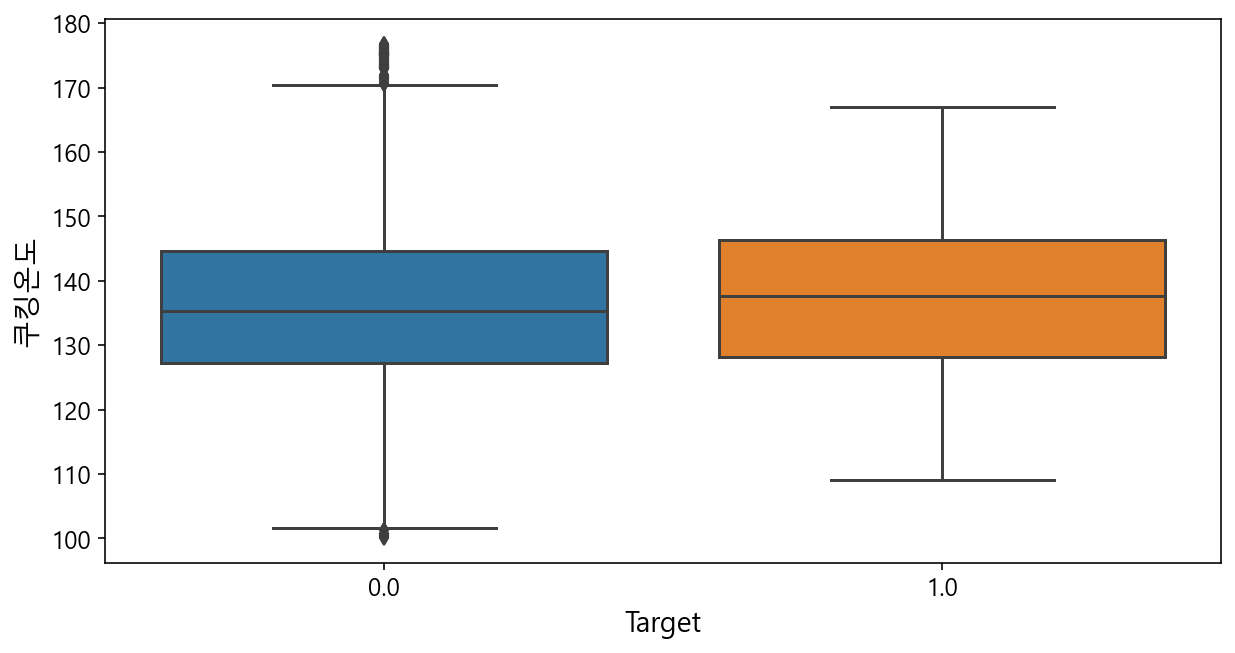

In [135]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='쿠킹온도')

<AxesSubplot:xlabel='Target', ylabel='쿠킹스팀압력'>

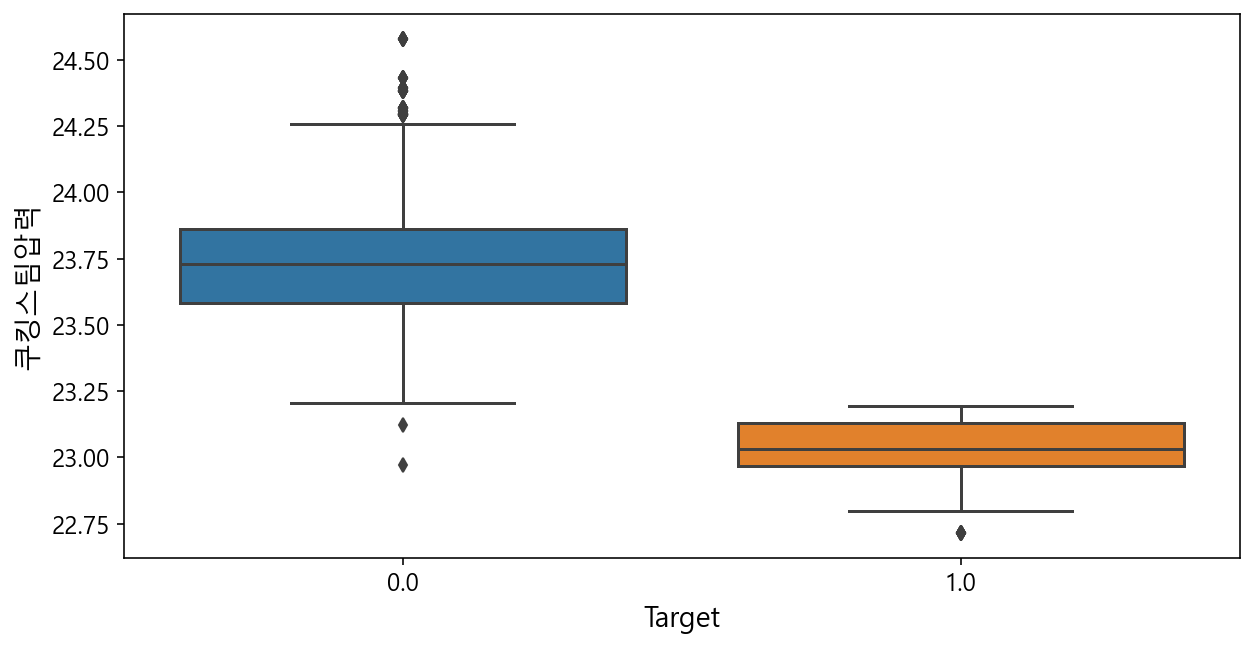

In [136]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='쿠킹스팀압력')

<AxesSubplot:xlabel='Target', ylabel='실링압력'>

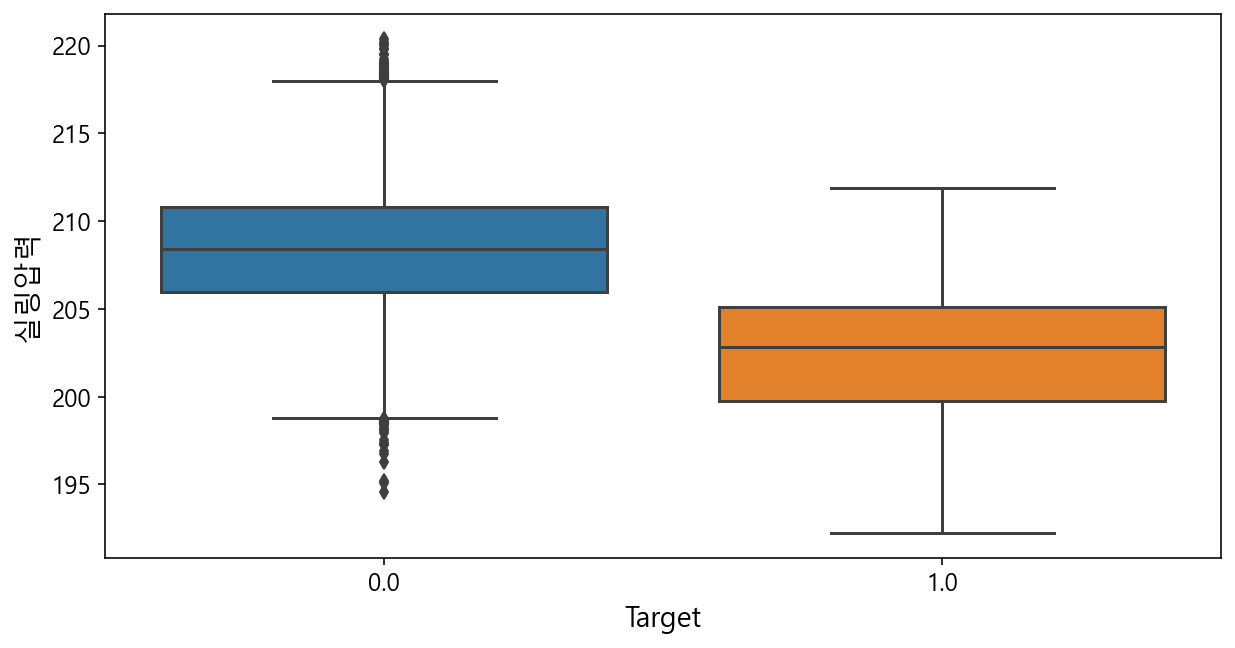

In [137]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='실링압력')

<AxesSubplot:xlabel='Target', ylabel='생산시간'>

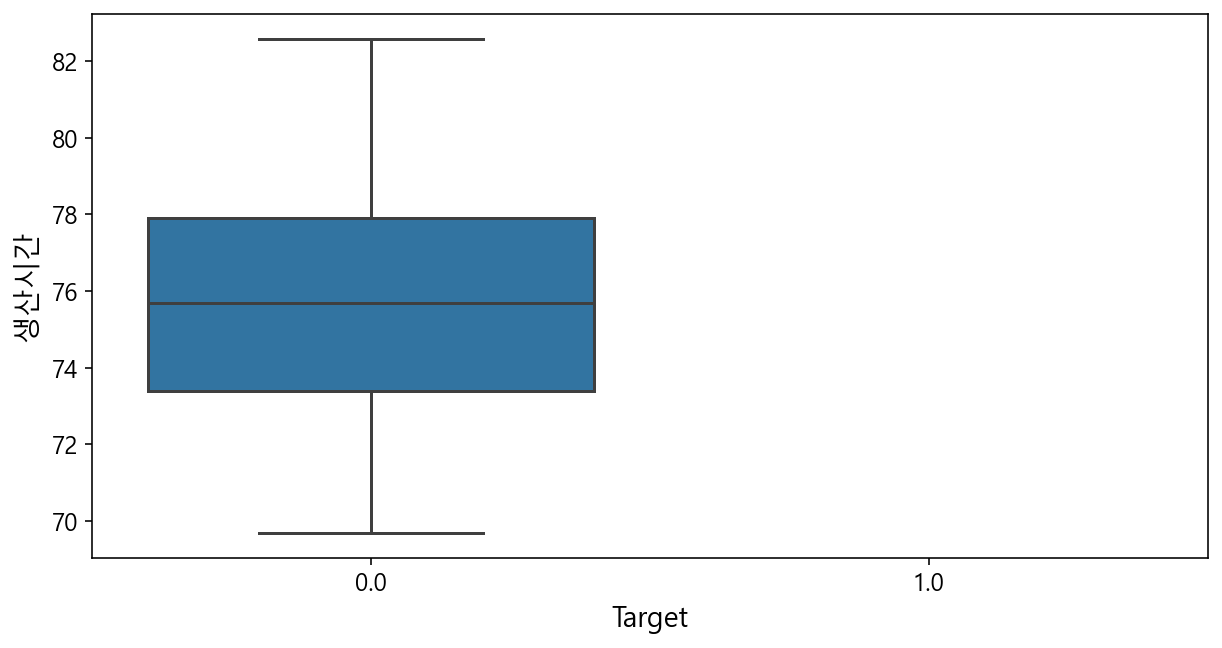

In [138]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='생산시간')

- 오류의 빈도수가 가장 많은 볶음밥 제품에서, 에러/정상 제품의 조업조건을 비교해 본 결과, 
- 실링압력 / 쿠킹스팀압력 / 충전실온도 에서 차이가 있는 것을 시각화를 통해 확인 
- 가설 검정을 실시하여, 앞서 확인한 에러/정상 제품의 조업조건의 유의미한 차이가 있는지 객관적 규명 실시 

In [143]:
import scipy.stats as stats

In [144]:
# 연속형 데이터의 정규성 검정 실시 
stats.normaltest(df3_process_rice['실링압력']) 

NormaltestResult(statistic=25.61949862601147, pvalue=2.733987715227238e-06)

In [145]:
stats.normaltest(df3_process_rice['쿠킹스팀압력'])

NormaltestResult(statistic=284.2100627823364, pvalue=1.9256130305328622e-62)

In [146]:
stats.normaltest(df3_process_rice['충전실온도'])

NormaltestResult(statistic=289.22210045287665, pvalue=1.5711543943327137e-63)

- 앞서 확인한 연속형 인자가 모두 비정규 분포 -> 범주형 VS 연속형 집단 간 평균 비교에서, wilcoxon Test로 검정 

In [147]:
cond1 = (df3_process_rice['Target']==1)

df3_process_rice_target = df3_process_rice.loc[cond1]
df3_process_rice_non_target = df3_process_rice.loc[~cond1]

In [148]:
# 귀무가설 : 제품 불량 여부에 따른 실링 압력의 평균의 차이가 있을 없을 것이다. 
# 대립가설 : 제품 불량 여부에 따른 실링 압력의 평균의 차이가 있을 것이다. 
stats.ranksums(df3_process_rice_target['실링압력'], df3_process_rice_non_target['실링압력'])
# P.value <0.05 
# 통계적 결론 : 대립가설 참 
# 사실적 결론 : 제품 불량 여부에 따른 실링 압력의 평균의 차이가 있을 것이다. 

RanksumsResult(statistic=-24.50999566390155, pvalue=1.1557603474660893e-132)

In [149]:
# 귀무가설 : 제품 불량 여부에 따른 쿠킹스팀압력의 평균의 차이가 있을 없을 것이다. 
# 대립가설 : 제품 불량 여부에 따른 쿠킹스팀압력의 평균의 차이가 있을 것이다. 
stats.ranksums(df3_process_rice_target['쿠킹스팀압력'], df3_process_rice_non_target['쿠킹스팀압력'])
# P.value <0.05 
# 통계적 결론 : 대립가설 참 
# 사실적 결론 : 제품 불량 여부에 따른 쿠킹스팀압력의 평균의 차이가 있을 것이다. 

RanksumsResult(statistic=-32.710402060597396, pvalue=1.1110364965217213e-234)

In [150]:
# 귀무가설 : 제품 불량 여부에 따른 충전실온도의 평균의 차이가 있을 없을 것이다. 
# 대립가설 : 제품 불량 여부에 따른 충전실온도의 평균의 차이가 있을 것이다. 
stats.ranksums(df3_process_rice_target['충전실온도'], df3_process_rice_non_target['쿠킹스팀압력'])
# P.value <0.05 
# 통계적 결론 : 대립가설 참 
# 사실적 결론 : 제품 불량 여부에 따른 충전실온도의 평균의 차이가 있을 것이다. 

RanksumsResult(statistic=32.718583066323376, pvalue=8.499364488183402e-235)

- 가설 검정의 결과 또한, 실링압력 / 쿠킹스팀압력 / 충전실온도 에서 불량 제품과 정상 제품의 차이를 확인 
- 따라서, 실링압력 / 쿠킹스팀압력 / 충전실온도에 대한 관리도를 이용해, 모니터링 시스템 구축 

In [151]:
# 볶음밥 제조에서 실링압력의 관리도 계산 함수 
# 관리 상한선 /관리 하한선 계산 (표준편차 3)
def control_chart(x_feature,n,m):
    USL = df3_process_rice[x_feature].mean() + (df3_process_rice[x_feature].std() * 3 )
    LSL = df3_process_rice[x_feature].mean() - (df3_process_rice[x_feature].std() * 3 )
    df3_process_rice_cc = df3_process_rice[[x_feature]].reset_index()
    
    df3_process_rice_cc['Center'] = df3_process_rice_cc[x_feature].mean()
    df3_process_rice_cc['USL'] = USL
    df3_process_rice_cc['LSL'] = LSL
    df3_process_rice_cc.head()
    
    input_data = df3_process_rice_cc.iloc[n:m]

    plt.figure(figsize=[15,5])
    sns.pointplot(data=input_data, x=input_data.index, y=x_feature)
    sns.lineplot(data=input_data, x=input_data.index, y='Center', color='b')
    sns.lineplot(data=input_data, x=input_data.index, y='USL', color='r')
    sns.lineplot(data=input_data, x=input_data.index, y='LSL', color='r')

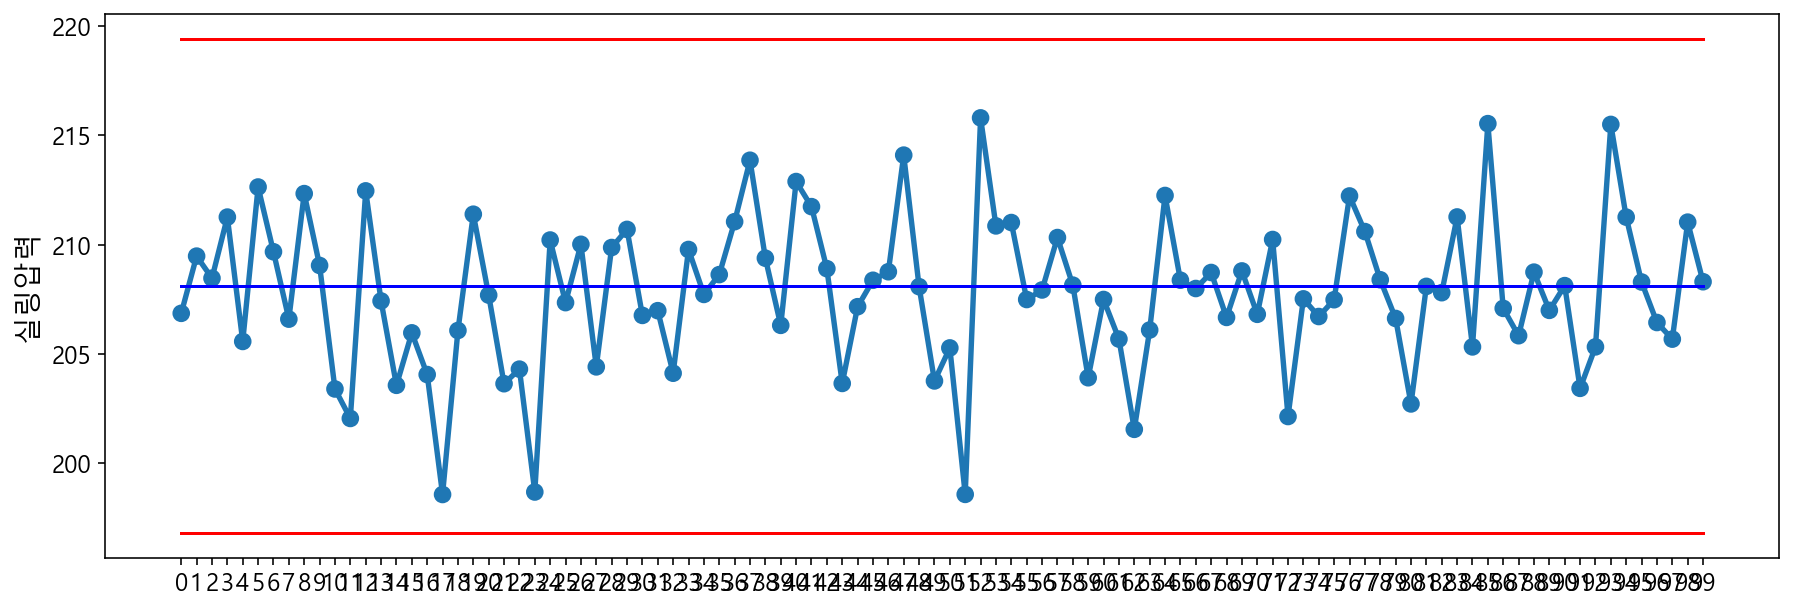

In [152]:
control_chart('실링압력',0,100)

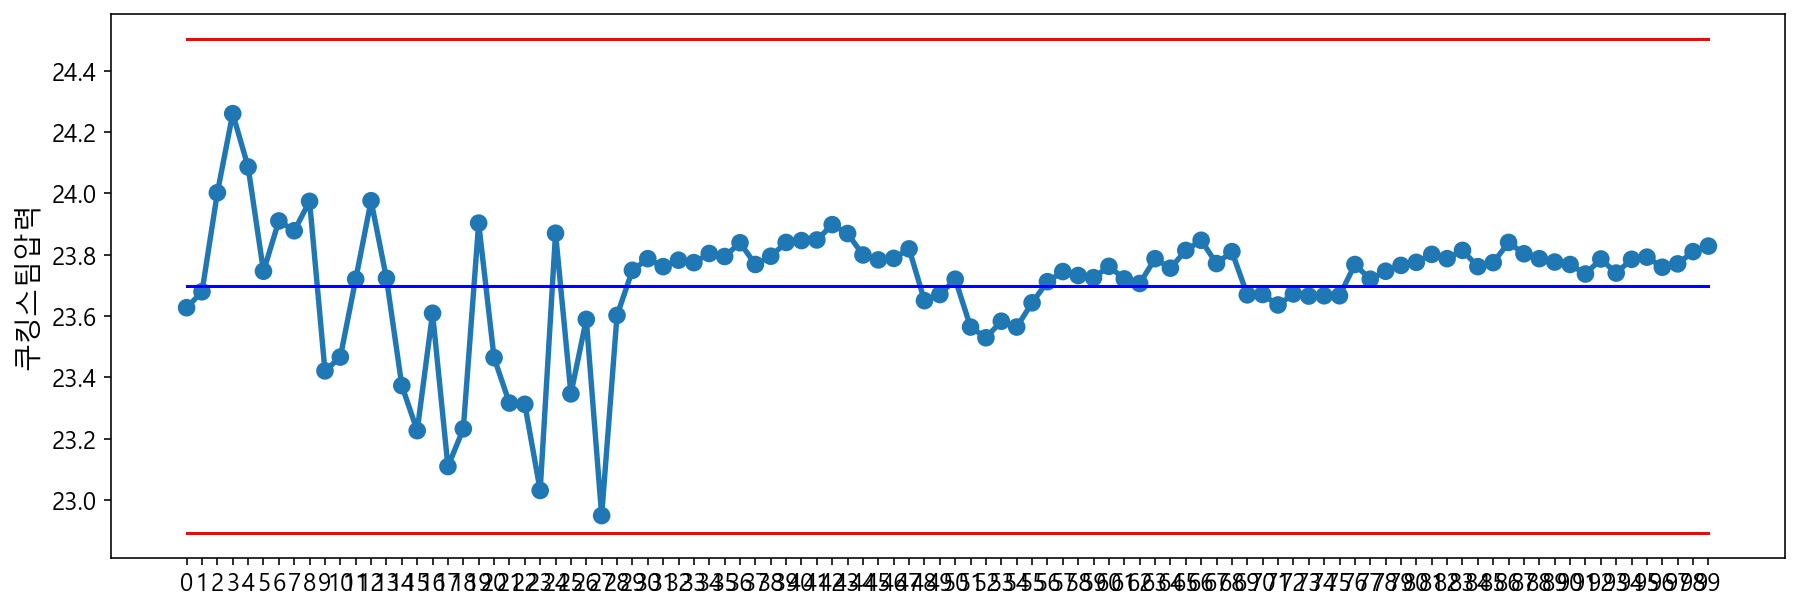

In [153]:
control_chart('쿠킹스팀압력',0,100)

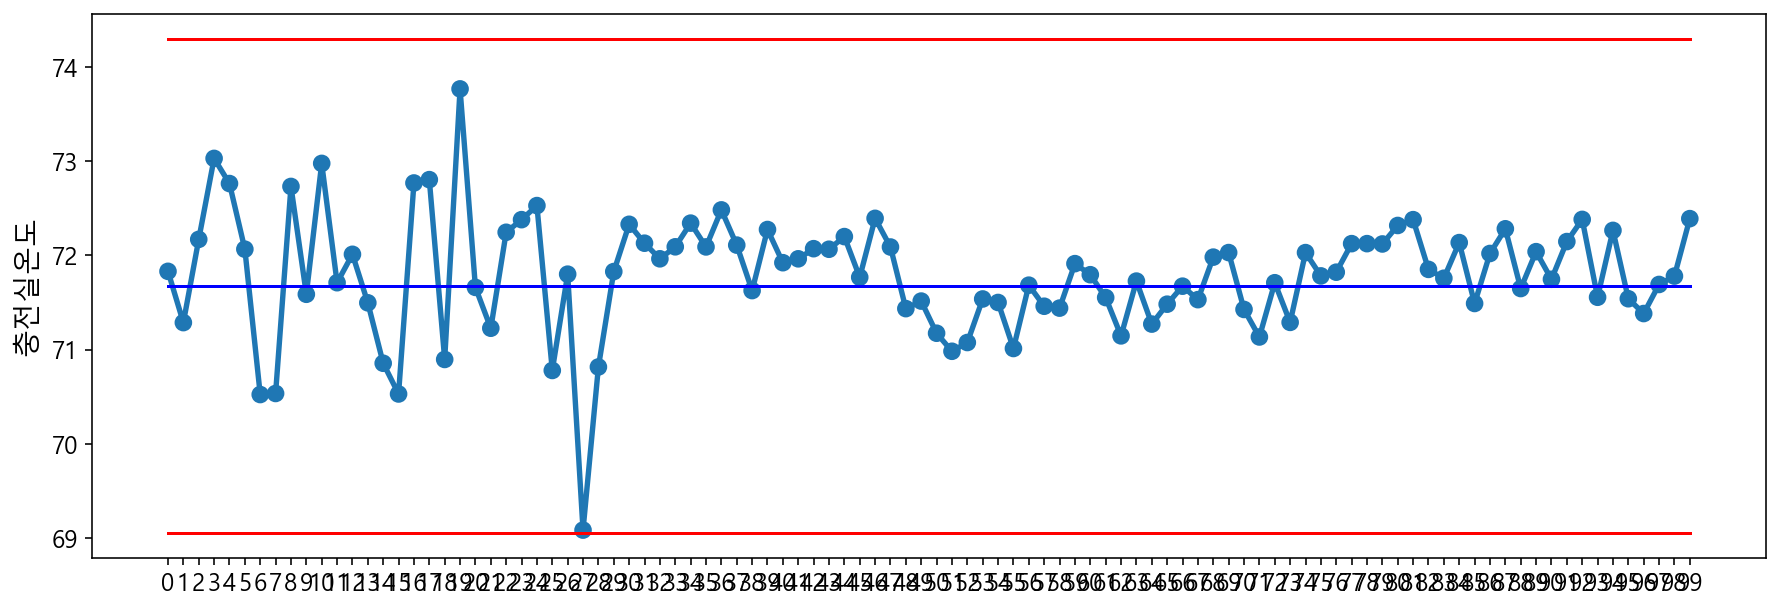

In [154]:
control_chart('충전실온도',0,100)

# 3. 불량 분류 모델 구성  

1. 제품 불량 분류를 위한 머신러닝 분류 모델 구성 
2. 가장 불량이 많이 발생하는 볶음밥 공정에 대한 분류모델을 구성 

In [155]:
df3_process['Target'].value_counts() # 불량 여부 

0.0    22946
1.0     1150
Name: Target, dtype: int64

In [156]:
df3_process.columns

Index(['순번', '생산라인코드', '생산라인명', '품목코드', '품목명', '작업장코드', '충전실온도', '실링온도',
       '쿠킹온도', '쿠킹스팀압력', '실링압력', '생산시간', '생산일자', 'ID', '발생시간', '종료시간',
       '오류조치시간', '비가동코드', 'Error_Message', '오류발생작업장명', 'Target', '구분'],
      dtype='object')

In [157]:
df3_process['구분'].value_counts()

ect     15372
rice     8629
Name: 구분, dtype: int64

In [158]:
cond1 = (df3_process['구분']=='rice')
df3_process_rice = df3_process.loc[cond1]

In [159]:
df3_process_rice_model = df3_process_rice.drop(columns=['발생시간', '종료시간','오류조치시간', '비가동코드','ID',
                          'Error_Message', '오류발생작업장명','구분','순번','생산라인코드','쿠킹스팀압력',
                         '생산라인명', '생산일자', '품목코드', '품목명', '작업장코드'])

In [160]:
Y = df3_process_rice_model['Target']
X = df3_process_rice_model.drop(columns=['Target'])

In [161]:
from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, 
                                                    random_state=1000)

**Decision Tree Model**

In [163]:
pipe_list = [('imputer', KNNImputer()),
             ('model',DecisionTreeClassifier())]

# Hard Voting  : 가장 집계결과가 좋은 모델을 선택해 학습을 진행 
# Soft Voting  : 각 모델의 평균 값을 계산하여, 예측 평균 확률이 가장 높은 모델로 학습을 진행 
pipe_model = Pipeline(pipe_list)

In [164]:
hyper_parameter = {'model__max_depth':range(5,10),
                  'model__criterion':['gini','entropy'],
                  'model__min_samples_split':range(5,10),
                  'model__min_samples_leaf':range(5,10),
                  'model__class_weight':['balanced',None]}

grid_model = GridSearchCV(pipe_model, param_grid=hyper_parameter, cv=3, 
                          n_jobs = -1, scoring='f1')
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': ['balanced', None],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(5, 10),
                         'model__min_samples_leaf': range(5, 10),
                         'model__min_samples_split': range(5, 10)},
             scoring='f1')

In [165]:
best_model= grid_model.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [166]:
best_model

Pipeline(steps=[('imputer', KNNImputer()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=8,
                                        min_samples_split=5))])

In [167]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      5766
         1.0       0.77      0.43      0.55       274

    accuracy                           0.97      6040
   macro avg       0.87      0.71      0.77      6040
weighted avg       0.96      0.97      0.96      6040



In [168]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2490
         1.0       0.75      0.42      0.54        99

    accuracy                           0.97      2589
   macro avg       0.86      0.71      0.76      2589
weighted avg       0.97      0.97      0.97      2589



In [169]:
from sklearn.tree import plot_tree

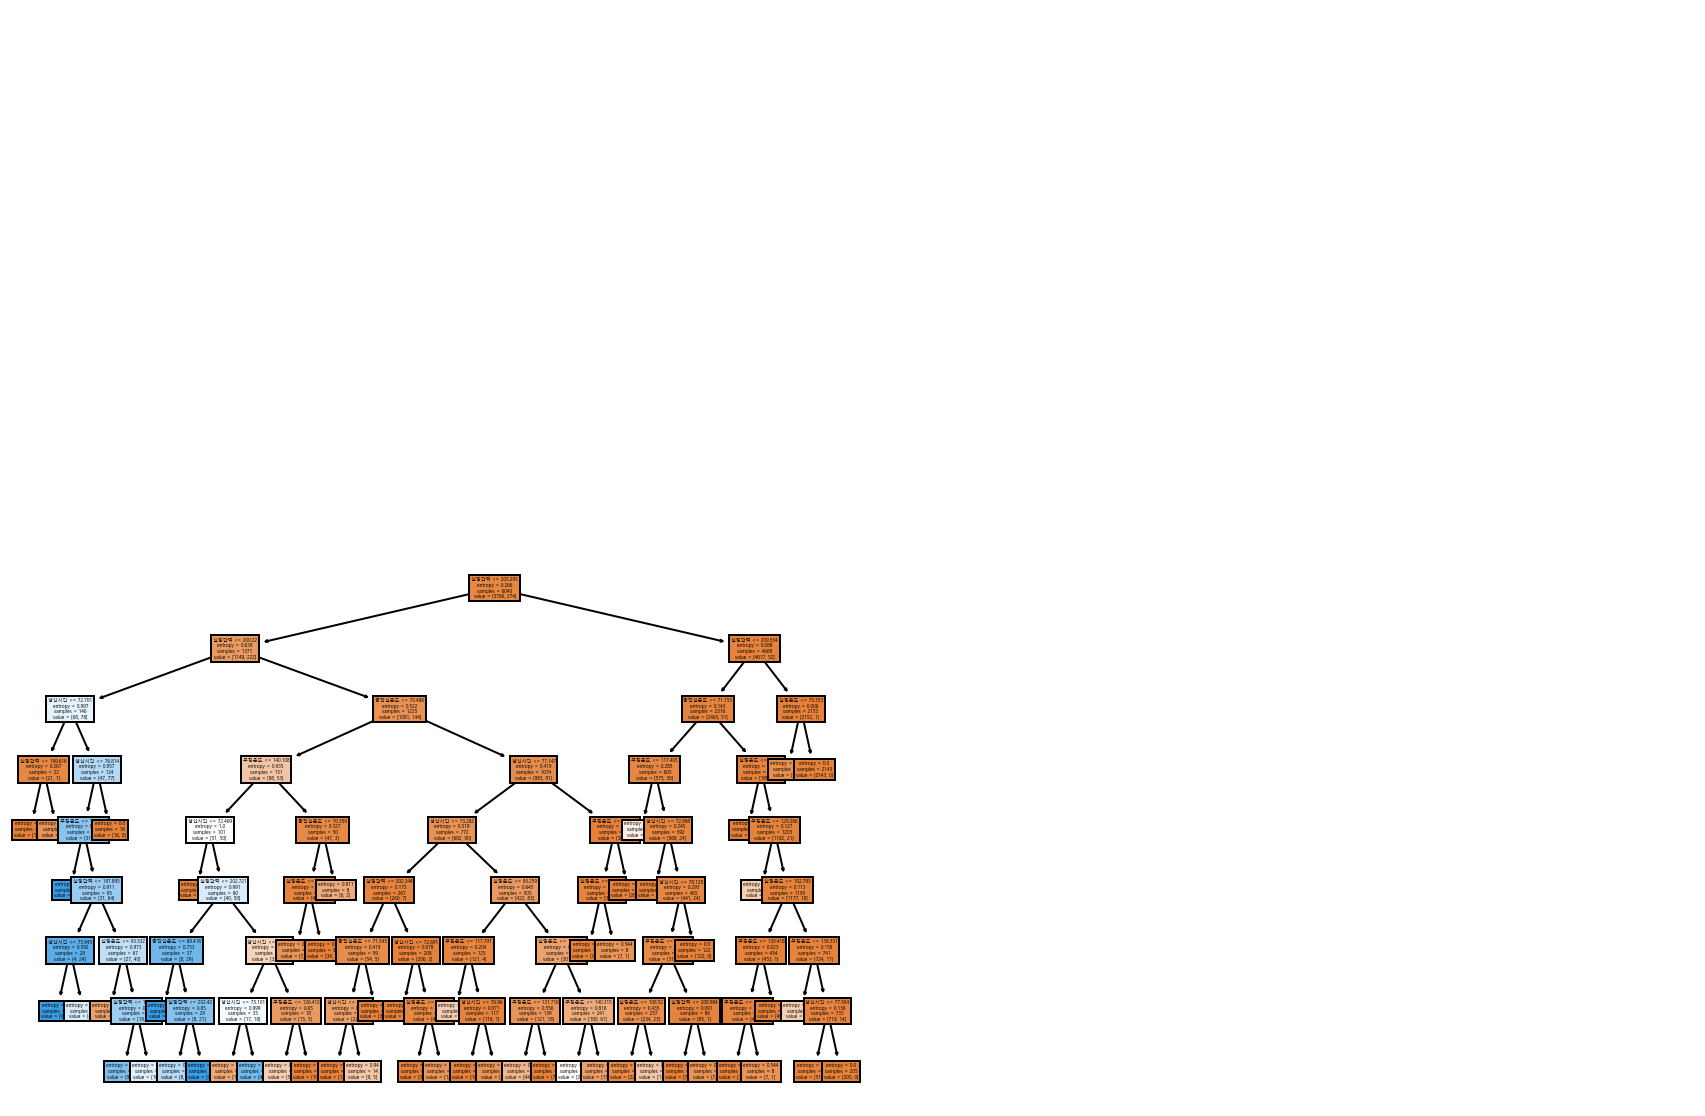

In [170]:
plt.figure(figsize=[15, 10])
plot_tree(best_model['model'],filled=True, feature_names=X_train.columns.tolist() )
plt.savefig('tree_img.png')
plt.show()

In [171]:
# feature Importances (변수 중요도)
df_importance = pd.DataFrame()
df_importance['Feature']   = X_train.columns
df_importance['importance'] = best_model['model'].feature_importances_

In [172]:
df_importance.sort_values(by='importance', ascending=False).head(10)

,Feature,importance
3,실링압력,0.504246
4,생산시간,0.193924
2,쿠킹온도,0.134676
0,충전실온도,0.085586
1,실링온도,0.081568


**Voting Model**

In [173]:
pipe_list = [('imputer', KNNImputer()),
             ('model', VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                                                    ('RF', RandomForestClassifier()),
                                                    ('GB', GradientBoostingClassifier())],
                                        voting='hard'))]

# Hard Voting  : 가장 집계결과가 좋은 모델을 선택해 학습을 진행 
# Soft Voting  : 각 모델의 평균 값을 계산하여, 예측 평균 확률이 가장 높은 모델로 학습을 진행 
pipe_model = Pipeline(pipe_list)

In [ ]:
hyper_parameter = {'model__DT__max_depth':range(5,10),
                  'model__DT__min_samples_split':range(5,10),
                  'model__DT__min_samples_leaf':range(5,10),
                  'model__DT__class_weight':['balanced'],
                  'model__RF__max_depth':range(5,10),
                  'model__RF__min_samples_split':[10,15,20,25],
                  'model__RF__min_samples_leaf':range(5,10),
                  'model__RF__class_weight':['balanced'],
                  'model__RF__n_estimators':[50,100,150],
                  'model__GB__max_depth':[9],
                  'model__GB__min_samples_split':[5],
                  'model__GB__min_samples_leaf':[7],
                  'model__GB__n_estimators':[200],
                  'model__GB__n_iter_no_change':[5],
                  'model__GB__tol':[0.01]}

grid_model = GridSearchCV(pipe_model, 
                          cv=3, 
                          n_jobs=-1, 
                          scoring='f1', 
                          param_grid=hyper_parameter)

grid_model.fit(X_train, Y_train)

In [ ]:
best_model = grid_model.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred  = best_model.predict(X_test)

In [ ]:
best_model

In [ ]:
print(classification_report(Y_train,Y_train_pred))

In [ ]:
print(classification_report(Y_test,Y_test_pred))